In [5]:
import numpy as np
import copy
import gym
import matplotlib.pyplot as plt
from random import sample

In [6]:
env = gym.make('BipedalWalker-v3')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

##  Tile Coding Discretization

In [7]:
def sub_interval(t,a,b,n):
        if True in [((t <= a + (i+1)*(b-a)/n) and (t > a + i*(b-a)/n)) for  i in range(n)]:
            return  [((t <= a + (i+1)*(b-a)/n) and (t > a + i*(b-a)/n)) for  i in range(n)].index(True)
        else: return None

In [8]:
def X(s):
    enc = []
    for k in range(8):
        i = sub_interval(s[0],-1.2-k*0.22/8,0.72-k*0.22/8,8)
        j = sub_interval(s[1],-0.07 - k*0.01/8,0.08-k*0.01/8,8)
        u = np.zeros(64)
        if i != None and j!= None: 
            u[8*i + j] = 1
        enc.append(u)
    return np.hstack(enc)

In [9]:
X([-0.9,0.01])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
actions = np.array([[0,0,1],[0,1,0],[1,0,0]])
def X(s,a):
    enc = []
    for k in range(8):
        i = sub_interval(s[0],-1.2-k*0.22/8,0.72-k*0.22/8,8)
        j = sub_interval(s[1],-0.07 - k*0.01/8,0.08-k*0.01/8,8)
        u = np.zeros(64)
        if i != None and j!= None: 
            u[8*i + j] = 1
        enc.append(u)
    return np.append(np.hstack(enc),actions[a])

        

## SARSA

In [11]:
s = env.reset()
a = 1
update_frequency = 500
update_counter = 0
w = np.zeros(8*8*8 + 3)
w_fixed = np.zeros(8*8*8 + 3)
eps = 1.0
decay = 0.99
alpha = 1e-3
done = False
gamma = 0.995
r = 0
params = []
rewards = []
for k in range(2000):
    
    s = env.reset()
    a = 2
    done = False
    total_reward = 0
    while not done:
        update_counter+=1
        s_prime,r,done,_ = env.step(a)
        
        t = np.random.random()
        if t < eps:
            a_prime = np.random.choice([0,1,2])
        else:
            a_prime = np.argmax([X(s_prime,a)@w for a in [0,1,2]])
    
        if update_counter > update_frequency:
            w_fixed = w
            update_counter = 0
            print('updated target')
        
        w = w + alpha * (r + gamma*X(s_prime,a_prime) @ w_fixed - X(s,a) @ w) * X(s,a)
        s = s_prime
        a = a_prime
        eps = eps * decay
        total_reward += r
        
        env.render()
    params.append(w)
    print(k , total_reward)
    rewards.append(total_reward)


    

TypeError: 'int' object is not subscriptable

In [3]:
plt.plot(rewards);

NameError: name 'rewards' is not defined

In [13]:
np.argmax(rewards)

1645

In [14]:
w = params[1645]

In [17]:
rewards[1645]

-97.0

In [12]:
def Q(s,a):
    return X(s,a) @ w

In [13]:
for k in range(10):
    s = env.reset()
    done = False

    while not done:

        a =np.argmax([Q(s,a) for a in [0,1,2]])
        s, r,done,_ = env.step(a)
        env.render()

    

IndexError: invalid index to scalar variable.

## Q-Learning

In [14]:
s = env.reset()
a = 1
update_frequency = 500
step_counter = 0
w = np.zeros(8*8*8 + 3)
w_target = np.zeros(8*8*8 + 3)
eps = 1.0
decay = 0.99
alpha = 1e-3
done = False
gamma = 0.995
r = -1
params = []
rewards = []
for k in range(2000):
    s = env.reset()
    a = 1
    done = False
    total_reward = 0
    
    while not done:
        step_counter+=1

        t = np.random.random()
        if t < eps:
                a = np.random.choice([0,1,2])
  
        else:
                a = np.argmax([X(s,b)@w for b in [0,1,2]])
       
        s_prime,r,done,_ = env.step(a)
        
        if step_counter > update_frequency:
            w_target = w
            step_counter = 0
            print('updated target')

        w = w + alpha * (r + gamma*np.max([X(s_prime,a) @ w_target for a in [0,1,2]]) - X(s,a) @ w) * X(s,a)
        
        
        s = s_prime
        eps = eps * decay
        total_reward += r
        if k > 500 and k % 50 == 0:
            env.render()
    params.append(w)
    print(k , total_reward)
    rewards.append(total_reward)

IndexError: invalid index to scalar variable.

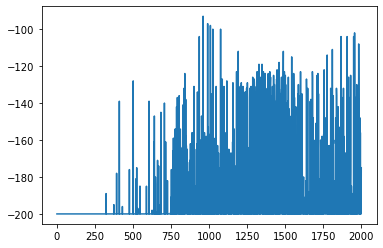

In [20]:
plt.plot(rewards)

## Double Q-Learning

In [21]:
w_1 = np.zeros(8*8*8 + 3)
w_2 = np.zeros(8*8*8 + 3)
eps = 1.0
decay = 0.99
alpha = 1e-3
done = False
gamma = 0.995
r = -1
params_1 = []
params_2 = []
rewards = []
for k in range(2000):
    s = env.reset()
    a = 1
    done = False
    total_reward = 0
    
    while not done:

        t = np.random.random()
        if t < eps:
                a = np.random.choice([0,1,2])
  
        else:
                a = np.argmax([X(s,b)@(w_1 + w_2) for b in [0,1,2]])
            
        s_prime,r,done,_ = env.step(a)
        
        coin = np.random.choice([0,1])
        
        if coin == 0:
            a_prime = np.argmax([X(s_prime,a) @ w_1 for a in [0,1,2]])
            w_1 = w_1 + alpha * (r + gamma*(X(s_prime,a_prime) @ w_2) - X(s,a) @ w_1) * X(s,a)
            
        else:
            a_prime = np.argmax([X(s_prime,a) @ w_2 for a in [0,1,2]])
            w_2 = w_2 + alpha * (r + gamma*(X(s_prime,a_prime) @ w_1) - X(s,a) @ w_2) * X(s,a) 
        
        
        s = s_prime
        eps = eps * decay
        total_reward += r
        
#         env.render()
    params_1.append(w_1)
    params_2.append(w_2)
    print(k , total_reward)
    rewards.append(total_reward)

0 -200.0
1 -200.0
2 -200.0
3 -200.0
4 -200.0
5 -200.0
6 -200.0
7 -200.0
8 -200.0
9 -200.0
10 -200.0
11 -200.0
12 -200.0
13 -200.0
14 -200.0
15 -200.0
16 -200.0
17 -200.0
18 -200.0
19 -200.0
20 -200.0
21 -200.0
22 -200.0
23 -200.0
24 -200.0
25 -200.0
26 -200.0
27 -200.0
28 -200.0
29 -200.0
30 -200.0
31 -200.0
32 -200.0
33 -200.0
34 -200.0
35 -200.0
36 -200.0
37 -200.0
38 -200.0
39 -200.0
40 -200.0
41 -200.0
42 -200.0
43 -200.0
44 -200.0
45 -200.0
46 -200.0
47 -200.0
48 -200.0
49 -200.0
50 -200.0
51 -200.0
52 -200.0
53 -200.0
54 -200.0
55 -200.0
56 -200.0
57 -200.0
58 -200.0
59 -200.0
60 -200.0
61 -200.0
62 -200.0
63 -200.0
64 -200.0
65 -200.0
66 -200.0
67 -200.0
68 -200.0
69 -200.0
70 -200.0
71 -200.0
72 -200.0
73 -200.0
74 -200.0
75 -200.0
76 -200.0
77 -200.0
78 -200.0
79 -200.0
80 -200.0
81 -200.0
82 -200.0
83 -200.0
84 -200.0
85 -200.0
86 -200.0
87 -200.0
88 -200.0
89 -200.0
90 -200.0
91 -200.0
92 -200.0
93 -200.0
94 -200.0
95 -200.0
96 -200.0
97 -200.0
98 -200.0
99 -200.0
100 -200.0

755 -200.0
756 -200.0
757 -200.0
758 -174.0
759 -200.0
760 -200.0
761 -200.0
762 -200.0
763 -200.0
764 -200.0
765 -200.0
766 -200.0
767 -200.0
768 -200.0
769 -200.0
770 -200.0
771 -200.0
772 -200.0
773 -176.0
774 -200.0
775 -200.0
776 -200.0
777 -200.0
778 -200.0
779 -200.0
780 -200.0
781 -200.0
782 -200.0
783 -200.0
784 -200.0
785 -200.0
786 -200.0
787 -200.0
788 -200.0
789 -200.0
790 -200.0
791 -200.0
792 -200.0
793 -200.0
794 -200.0
795 -200.0
796 -200.0
797 -200.0
798 -200.0
799 -200.0
800 -200.0
801 -200.0
802 -200.0
803 -200.0
804 -200.0
805 -200.0
806 -200.0
807 -200.0
808 -200.0
809 -200.0
810 -200.0
811 -200.0
812 -173.0
813 -200.0
814 -200.0
815 -200.0
816 -178.0
817 -200.0
818 -200.0
819 -200.0
820 -200.0
821 -200.0
822 -200.0
823 -200.0
824 -200.0
825 -200.0
826 -200.0
827 -200.0
828 -200.0
829 -200.0
830 -200.0
831 -200.0
832 -200.0
833 -200.0
834 -200.0
835 -200.0
836 -200.0
837 -200.0
838 -200.0
839 -200.0
840 -200.0
841 -168.0
842 -200.0
843 -200.0
844 -200.0
845 -200.0

1459 -200.0
1460 -200.0
1461 -180.0
1462 -200.0
1463 -144.0
1464 -200.0
1465 -200.0
1466 -200.0
1467 -134.0
1468 -131.0
1469 -200.0
1470 -149.0
1471 -200.0
1472 -200.0
1473 -200.0
1474 -149.0
1475 -194.0
1476 -143.0
1477 -200.0
1478 -200.0
1479 -200.0
1480 -200.0
1481 -123.0
1482 -200.0
1483 -200.0
1484 -200.0
1485 -200.0
1486 -200.0
1487 -200.0
1488 -200.0
1489 -200.0
1490 -200.0
1491 -200.0
1492 -200.0
1493 -151.0
1494 -200.0
1495 -200.0
1496 -200.0
1497 -200.0
1498 -200.0
1499 -200.0
1500 -159.0
1501 -200.0
1502 -200.0
1503 -200.0
1504 -200.0
1505 -136.0
1506 -200.0
1507 -200.0
1508 -200.0
1509 -200.0
1510 -200.0
1511 -200.0
1512 -200.0
1513 -200.0
1514 -200.0
1515 -200.0
1516 -200.0
1517 -152.0
1518 -200.0
1519 -200.0
1520 -200.0
1521 -200.0
1522 -200.0
1523 -200.0
1524 -200.0
1525 -200.0
1526 -133.0
1527 -200.0
1528 -200.0
1529 -200.0
1530 -200.0
1531 -200.0
1532 -200.0
1533 -200.0
1534 -127.0
1535 -200.0
1536 -200.0
1537 -143.0
1538 -200.0
1539 -200.0
1540 -136.0
1541 -200.0
1542

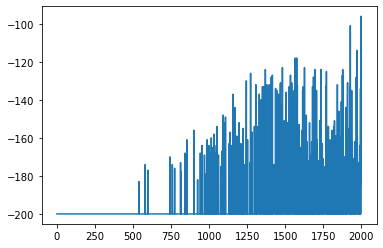

In [22]:
plt.plot(rewards);

## DQN

In [3]:
import random
from collections import deque

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam

In [5]:
memory = deque(maxlen=10000)

In [6]:
class DQN(nn.Module):
    def __init__(self,in_dim,out_dim,n_hid):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.n_hid = n_hid
        
        self.fc1 = nn.Linear(in_dim,n_hid)
        self.fc2 = nn.Linear(n_hid,out_dim)

        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        y =self.fc2(x)

        return y
    
        
        

In [7]:
def store(s,a,r,s_next,done):
    memory.append((s,a,r,s_next,done))

In [8]:
dqn = DQN(2,3,32)
target_model = DQN(2,3,32)

In [9]:
eps = 1.0
batch_size = 64
gamma = 0.95

epsi_high = 0.9
epsi_low = 0.05
decay = 0.9

In [10]:
def act(state):
        if (np.random.random() < eps):
                action = np.random.choice([0,1,2])
        else:
                action = torch.argmax(dqn(torch.FloatTensor(state).unsqueeze(0)),dim=1).detach().numpy().item()
                
        return action

In [11]:
loss_fun = nn.SmoothL1Loss()
opt = Adam(dqn.parameters(),lr=0.01)


In [14]:
def update(memory,batch_size):
        opt.zero_grad()

        samples = random.sample(memory,batch_size)
        
        
        s,a,r,s_next,d = (zip(*samples))
        
        s = torch.FloatTensor(s)
        a = torch.LongTensor(a)
        r = torch.FloatTensor(r)
        s_next = torch.FloatTensor(s_next)
        d = torch.FloatTensor(d)
        
        target_q = (r + gamma*target_model(s_next).max(dim=1)[0].detach()*(1 - d)).unsqueeze(1)
        policy_q = dqn(s).gather(1,a.unsqueeze(1))
        L = F.smooth_l1_loss(policy_q,target_q)
        L.backward()
        opt.step()
        return L.detach().item()

In [15]:
n_episodes = 2000
done = False
rewards = []
losses=[]
update_target_step = 200
step_counter = 0
losses = []
steps = 0

for e in range(n_episodes):
    state = env.reset()
    total_reward = 0

    for time in range(200):
        

        action = act(state)
    

        next_state, reward, done,_ = env.step(action)
        
        total_reward += reward
        
        store(state,action,reward,next_state,done)
        
        if done:
            print('episode: {}/{}, total reward: {},e: {:.2})'.format(e,n_episodes,total_reward,eps))
            rewards.append(total_reward)
            break
        
        if len(memory)>= batch_size:
            loss = update(memory,batch_size)
            
       

        
        state = next_state
        
        step_counter += 1
        if (step_counter > update_target_step):
                target_model.load_state_dict(dqn.state_dict())
                step_counter = 0
                print('updated target model')

    if eps > epsi_low:            
        eps = eps*decay
            
    losses.append(loss)
    

        

        

episode: 0/2000, total reward: -200.0,e: 1.0)
updated target model
episode: 1/2000, total reward: -200.0,e: 0.9)
updated target model
episode: 2/2000, total reward: -200.0,e: 0.81)
updated target model
episode: 3/2000, total reward: -200.0,e: 0.73)
updated target model
episode: 4/2000, total reward: -200.0,e: 0.66)
updated target model
episode: 5/2000, total reward: -200.0,e: 0.59)
updated target model
episode: 6/2000, total reward: -200.0,e: 0.53)
updated target model
episode: 7/2000, total reward: -200.0,e: 0.48)
updated target model
episode: 8/2000, total reward: -200.0,e: 0.43)
updated target model
episode: 9/2000, total reward: -200.0,e: 0.39)
updated target model
episode: 10/2000, total reward: -200.0,e: 0.35)
updated target model
episode: 11/2000, total reward: -200.0,e: 0.31)
updated target model
episode: 12/2000, total reward: -200.0,e: 0.28)
updated target model
episode: 13/2000, total reward: -200.0,e: 0.25)
updated target model
episode: 14/2000, total reward: -200.0,e: 0.23

updated target model
episode: 118/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 119/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 120/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 121/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 122/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 123/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 124/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 125/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 126/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 127/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 128/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 129/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 130/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 131/2000, total reward: -200.0,e: 0.047)
update

updated target model
episode: 234/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 235/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 236/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 237/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 238/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 239/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 240/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 241/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 242/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 243/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 244/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 245/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 246/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 247/2000, total reward: -200.0,e: 0.047)
update

updated target model
episode: 350/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 351/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 352/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 353/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 354/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 355/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 356/2000, total reward: -168.0,e: 0.047)
updated target model
episode: 357/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 358/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 359/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 360/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 361/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 362/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 363/2000, total reward: -200.0,e: 0.047)
update

updated target model
episode: 466/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 467/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 468/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 469/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 470/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 471/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 472/2000, total reward: -200.0,e: 0.047)
episode: 473/2000, total reward: -131.0,e: 0.047)
updated target model
episode: 474/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 475/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 476/2000, total reward: -168.0,e: 0.047)
updated target model
episode: 477/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 478/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 479/2000, total reward: -200.0,e: 0.047)
updated target model
episod

episode: 582/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 583/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 584/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 585/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 586/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 587/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 588/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 589/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 590/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 591/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 592/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 593/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 594/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 595/2000, total reward: -200.0,e: 0.047)
updated target model
episod

episode: 698/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 699/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 700/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 701/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 702/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 703/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 704/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 705/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 706/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 707/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 708/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 709/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 710/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 711/2000, total reward: -200.0,e: 0.047)
updated target model
episod

updated target model
episode: 815/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 816/2000, total reward: -155.0,e: 0.047)
updated target model
episode: 817/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 818/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 819/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 820/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 821/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 822/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 823/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 824/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 825/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 826/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 827/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 828/2000, total reward: -200.0,e: 0.047)
update

episode: 932/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 933/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 934/2000, total reward: -150.0,e: 0.047)
updated target model
episode: 935/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 936/2000, total reward: -172.0,e: 0.047)
updated target model
episode: 937/2000, total reward: -173.0,e: 0.047)
updated target model
episode: 938/2000, total reward: -200.0,e: 0.047)
episode: 939/2000, total reward: -152.0,e: 0.047)
updated target model
episode: 940/2000, total reward: -176.0,e: 0.047)
updated target model
episode: 941/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 942/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 943/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 944/2000, total reward: -151.0,e: 0.047)
updated target model
episode: 945/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 946/2000, total re

episode: 1050/2000, total reward: -140.0,e: 0.047)
updated target model
episode: 1051/2000, total reward: -139.0,e: 0.047)
updated target model
episode: 1052/2000, total reward: -200.0,e: 0.047)
episode: 1053/2000, total reward: -139.0,e: 0.047)
updated target model
episode: 1054/2000, total reward: -138.0,e: 0.047)
updated target model
episode: 1055/2000, total reward: -143.0,e: 0.047)
episode: 1056/2000, total reward: -139.0,e: 0.047)
updated target model
episode: 1057/2000, total reward: -147.0,e: 0.047)
updated target model
episode: 1058/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1059/2000, total reward: -147.0,e: 0.047)
updated target model
episode: 1060/2000, total reward: -200.0,e: 0.047)
episode: 1061/2000, total reward: -146.0,e: 0.047)
updated target model
episode: 1062/2000, total reward: -142.0,e: 0.047)
updated target model
episode: 1063/2000, total reward: -147.0,e: 0.047)
updated target model
episode: 1064/2000, total reward: -167.0,e: 0.047)
epis

episode: 1166/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1167/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1168/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1169/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1170/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1171/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1172/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1173/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1174/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1175/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1176/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1177/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1178/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1179/2000, total reward: -200.0,e: 0.047)
updated targe

updated target model
episode: 1281/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1282/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1283/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1284/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1285/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1286/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1287/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1288/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1289/2000, total reward: -185.0,e: 0.047)
updated target model
episode: 1290/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1291/2000, total reward: -156.0,e: 0.047)
updated target model
episode: 1292/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1293/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1294/2000, total reward: -200.0,e:

episode: 1398/2000, total reward: -172.0,e: 0.047)
updated target model
episode: 1399/2000, total reward: -152.0,e: 0.047)
updated target model
episode: 1400/2000, total reward: -163.0,e: 0.047)
updated target model
episode: 1401/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1402/2000, total reward: -191.0,e: 0.047)
updated target model
episode: 1403/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1404/2000, total reward: -167.0,e: 0.047)
updated target model
episode: 1405/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1406/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1407/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1408/2000, total reward: -200.0,e: 0.047)
episode: 1409/2000, total reward: -198.0,e: 0.047)
updated target model
episode: 1410/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1411/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1412

updated target model
episode: 1513/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1514/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1515/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1516/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1517/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1518/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1519/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1520/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1521/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1522/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1523/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1524/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1525/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1526/2000, total reward: -200.0,e:

updated target model
episode: 1628/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1629/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1630/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1631/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1632/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1633/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1634/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1635/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1636/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1637/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1638/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1639/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1640/2000, total reward: -170.0,e: 0.047)
updated target model
episode: 1641/2000, total reward: -200.0,e:

episode: 1857/2000, total reward: -161.0,e: 0.047)
updated target model
episode: 1858/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1859/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1860/2000, total reward: -193.0,e: 0.047)
updated target model
episode: 1861/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1862/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1863/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1864/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1865/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1866/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1867/2000, total reward: -162.0,e: 0.047)
updated target model
episode: 1868/2000, total reward: -159.0,e: 0.047)
updated target model
episode: 1869/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1870/2000, total reward: -200.0,e: 0.047)
updated targe

updated target model
episode: 1973/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1974/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1975/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1976/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1977/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1978/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1979/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1980/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1981/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1982/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1983/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1984/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1985/2000, total reward: -200.0,e: 0.047)
updated target model
episode: 1986/2000, total reward: -200.0,e:

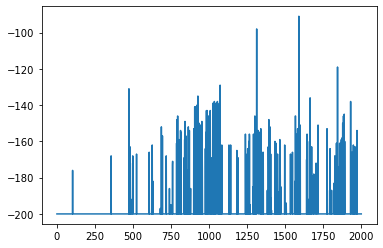

In [16]:
plt.plot(rewards);

## RND-DQN

In [39]:
memory = deque(maxlen=10000)

In [40]:
class QNet(nn.Module):
    def __init__(self,in_dim,out_dim,n_hid):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.n_hid = n_hid
        
        self.fc1 = nn.Linear(self.in_dim,self.n_hid)
        self.fc2 = nn.Linear(self.n_hid,self.out_dim)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [41]:
class NN(nn.Module):
    def __init__(self,in_dim,out_dim,n_hid):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.n_hid = n_hid
        
        self.fc1 = nn.Linear(in_dim,n_hid)
        self.fc2 = nn.Linear(n_hid,n_hid)
        self.fc3 = nn.Linear(n_hid,out_dim)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        
        return x
        

In [42]:
class RND():
    def __init__(self,in_dim,out_dim,n_hid):
        self.target = NN(in_dim,out_dim,n_hid)
        self.model = NN(in_dim,out_dim,n_hid)
        self.optimizer = Adam(self.model.parameters(),lr = 0.001)
        
    def get_reward(self,x):
        y_true = self.target(x).detach()
        y_pred = self.model(x)
        reward = torch.pow(y_pred - y_true,2).sum()
        return reward
    
    def update(self,Ri):
        Ri.sum().backward()
        self.optimizer.step()

In [43]:
dqn = QNet(2,3,32)
rnd = RND(2,128,124)
target_model = copy.deepcopy(dqn)

In [44]:
eps = 1.0
batch_size = 32

gamma = 0.95
eps_min = 0.01
eps_decay = 0.99

In [45]:
loss_fun = nn.SmoothL1Loss()
opt = Adam(dqn.parameters(),lr=0.01)

In [46]:
def store(s,a,r,s_next,done):
    memory.append((s,a,r,s_next,done))

In [47]:
def act(state):
        if (np.random.random() < eps):
                action = np.random.choice([0,1,2])
        else:
                action = torch.argmax(dqn(torch.FloatTensor(state).unsqueeze(0)),dim=1).detach().numpy().item()
                
        return action

In [48]:
def update(memory,batch_size):
        opt.zero_grad()

        samples = random.sample(memory,batch_size)
        
        
        s,a,r,s_next,d = (zip(*samples))
        
        s = torch.FloatTensor(s)
        a = torch.LongTensor(a)
        r = torch.FloatTensor(r)
        s_next = torch.FloatTensor(s_next)
        d = torch.FloatTensor(d)

       
        Ri = rnd.get_reward(s)
        rnd.update(Ri)
        
        target_q = (r + gamma*target_model(s_next).max(dim=1)[0].detach()*(1 - d)).unsqueeze(1)
        policy_q = dqn(s).gather(1,a.unsqueeze(1))
        L = F.smooth_l1_loss(policy_q,target_q)
        L.backward()
        opt.step()
        return L.detach().item()

In [ ]:
n_episodes = 2000
done = False
rewards = []
losses=[]
update_target_step = 500
step_counter = 0
losses = []
steps = 0

for e in range(n_episodes):
    state = env.reset()
    total_reward = 0

    for time in range(600):
        
        if e % 50 <= 4:
            env.render()

        action = act(state)
    

        next_state, reward, done,_ = env.step(action)
        
        reward_i = rnd.get_reward(torch.FloatTensor(state).unsqueeze(0)).detach().clamp(-1.0,1.0).item()
        reward_comb  =  reward + reward_i
        
        total_reward += reward
        
        store(state,action,reward_comb,next_state,done)
        
        if done:
            print('episode: {}/{}, total reward: {},e: {:.2})'.format(e,n_episodes,total_reward,eps))
            rewards.append(total_reward)
            break
        
        if len(memory)>= batch_size:
            loss = update(memory,batch_size)
            
       

        
        state = next_state
        
        step_counter += 1
        if (step_counter > update_target_step):
                target_model.load_state_dict(dqn.state_dict())
                step_counter = 0
                print('updated target model')

    if eps > eps_min:            
        eps = eps*eps_decay
            
    losses.append(loss)
    


episode: 0/2000, total reward: -200.0,e: 1.0)
episode: 1/2000, total reward: -200.0,e: 0.99)
updated target model
episode: 2/2000, total reward: -200.0,e: 0.98)
episode: 3/2000, total reward: -200.0,e: 0.97)
episode: 4/2000, total reward: -200.0,e: 0.96)
updated target model
episode: 5/2000, total reward: -200.0,e: 0.95)
episode: 6/2000, total reward: -200.0,e: 0.94)
updated target model
episode: 7/2000, total reward: -200.0,e: 0.93)
episode: 8/2000, total reward: -200.0,e: 0.92)
episode: 9/2000, total reward: -200.0,e: 0.91)
updated target model
episode: 10/2000, total reward: -200.0,e: 0.9)
episode: 11/2000, total reward: -200.0,e: 0.9)
updated target model
episode: 12/2000, total reward: -200.0,e: 0.89)
episode: 13/2000, total reward: -200.0,e: 0.88)
episode: 14/2000, total reward: -200.0,e: 0.87)
updated target model
episode: 15/2000, total reward: -200.0,e: 0.86)
episode: 16/2000, total reward: -200.0,e: 0.85)
updated target model
episode: 17/2000, total reward: -200.0,e: 0.84)
ep

episode: 146/2000, total reward: -200.0,e: 0.23)
episode: 147/2000, total reward: -200.0,e: 0.23)
updated target model
episode: 148/2000, total reward: -200.0,e: 0.23)
episode: 149/2000, total reward: -200.0,e: 0.22)
episode: 150/2000, total reward: -200.0,e: 0.22)
updated target model
episode: 151/2000, total reward: -200.0,e: 0.22)
episode: 152/2000, total reward: -200.0,e: 0.22)
updated target model
episode: 153/2000, total reward: -200.0,e: 0.21)
episode: 154/2000, total reward: -200.0,e: 0.21)
episode: 155/2000, total reward: -200.0,e: 0.21)
updated target model
episode: 156/2000, total reward: -200.0,e: 0.21)
episode: 157/2000, total reward: -200.0,e: 0.21)
updated target model
episode: 158/2000, total reward: -200.0,e: 0.2)
episode: 159/2000, total reward: -200.0,e: 0.2)
episode: 160/2000, total reward: -200.0,e: 0.2)
updated target model
episode: 161/2000, total reward: -200.0,e: 0.2)
episode: 162/2000, total reward: -200.0,e: 0.2)
updated target model
episode: 163/2000, total 

updated target model
episode: 289/2000, total reward: -200.0,e: 0.055)
episode: 290/2000, total reward: -200.0,e: 0.054)
episode: 291/2000, total reward: -200.0,e: 0.054)
updated target model
episode: 292/2000, total reward: -200.0,e: 0.053)
episode: 293/2000, total reward: -200.0,e: 0.053)
updated target model
episode: 294/2000, total reward: -200.0,e: 0.052)
episode: 295/2000, total reward: -200.0,e: 0.052)
episode: 296/2000, total reward: -200.0,e: 0.051)
updated target model
episode: 297/2000, total reward: -200.0,e: 0.051)
episode: 298/2000, total reward: -200.0,e: 0.05)
updated target model
episode: 299/2000, total reward: -200.0,e: 0.05)
episode: 300/2000, total reward: -200.0,e: 0.049)
episode: 301/2000, total reward: -200.0,e: 0.049)
updated target model
episode: 302/2000, total reward: -200.0,e: 0.048)
episode: 303/2000, total reward: -200.0,e: 0.048)
updated target model
episode: 304/2000, total reward: -200.0,e: 0.047)
episode: 305/2000, total reward: -200.0,e: 0.047)
episo

updated target model
episode: 430/2000, total reward: -200.0,e: 0.013)
episode: 431/2000, total reward: -200.0,e: 0.013)
episode: 432/2000, total reward: -200.0,e: 0.013)
updated target model
episode: 433/2000, total reward: -200.0,e: 0.013)
episode: 434/2000, total reward: -200.0,e: 0.013)
updated target model
episode: 435/2000, total reward: -200.0,e: 0.013)
episode: 436/2000, total reward: -200.0,e: 0.013)
episode: 437/2000, total reward: -200.0,e: 0.012)
updated target model
episode: 438/2000, total reward: -200.0,e: 0.012)
episode: 439/2000, total reward: -200.0,e: 0.012)
updated target model
episode: 440/2000, total reward: -200.0,e: 0.012)
episode: 441/2000, total reward: -200.0,e: 0.012)
episode: 442/2000, total reward: -200.0,e: 0.012)
updated target model
episode: 443/2000, total reward: -200.0,e: 0.012)
episode: 444/2000, total reward: -200.0,e: 0.012)
updated target model
episode: 445/2000, total reward: -200.0,e: 0.011)
episode: 446/2000, total reward: -200.0,e: 0.011)
epi

In [ ]:
plt.plot(rewards);

In [ ]:
plt.plot(rewards);

In [ ]:
obs = env.reset()
for t in range(200):
    env.render()
    x = torch.FloatTensor(obs)
    Q = dqn(x)
    action = Q.argmax().detach().item()
    new_obs,reward,done,_ = env.step(action)
    obs = new_obs
    if done:
        break
